In [168]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [170]:
df = pd.read_csv("CO2 Emissions_Canada.csv")
df.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


Simple Linear Regression
MSE: 949.9852533375358
R²: 0.7238115822302345


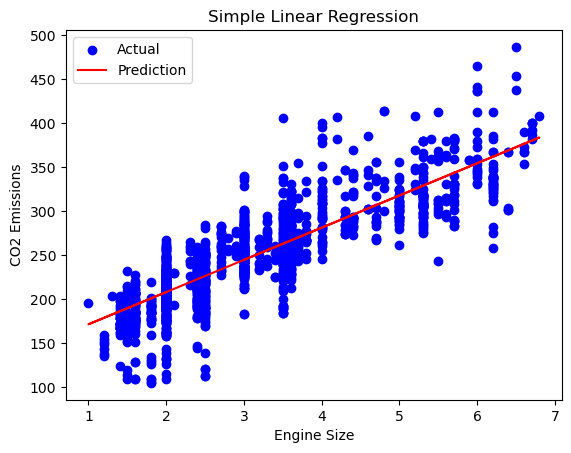

Multiple Linear Regression
MSE: 422.04096924840013
R²: 0.8773003821678078
Polynomial Regression
MSE: 272.02937018328146
R²: 0.9209131288366097
Ridge Regression
MSE: 422.0411461190848
R²: 0.8773003307463416
Lasso Regression
MSE: 422.0629294083813
R²: 0.8772939977088724


In [194]:

# Select features
X_simple = df[['Engine Size(L)']]
X_multi = df[['Engine Size(L)', 'Cylinders', 'Fuel Consumption City (L/100 km)', 'Fuel Consumption Hwy (L/100 km)']]
y = df['CO2 Emissions(g/km)']

# Train-test split
X_train_simple, X_test_simple, y_train, y_test = train_test_split(X_simple, y, test_size=0.2, random_state=42)
X_train_multi, X_test_multi, _, _ = train_test_split(X_multi, y, test_size=0.2, random_state=42)

# Simple Linear Regression
simple_model = LinearRegression()
simple_model.fit(X_train_simple, y_train)
y_pred_simple = simple_model.predict(X_test_simple)
print("Simple Linear Regression")
print("MSE:", mean_squared_error(y_test, y_pred_simple))
print("R²:", r2_score(y_test, y_pred_simple))

# Plot Simple Linear Regression
plt.scatter(X_test_simple, y_test, color='blue', label='Actual')
plt.plot(X_test_simple, y_pred_simple, color='red', label='Prediction')
plt.title("Simple Linear Regression")
plt.xlabel("Engine Size")
plt.ylabel("CO2 Emissions")
plt.legend()
plt.show()

# Multiple Linear Regression
multi_model = LinearRegression()
multi_model.fit(X_train_multi, y_train)
y_pred_multi = multi_model.predict(X_test_multi)
print("Multiple Linear Regression")
print("MSE:", mean_squared_error(y_test, y_pred_multi))
print("R²:", r2_score(y_test, y_pred_multi))

# Polynomial Regression
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train_multi)
X_test_poly = poly.transform(X_test_multi)
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)
y_pred_poly = poly_model.predict(X_test_poly)
print("Polynomial Regression")
print("MSE:", mean_squared_error(y_test, y_pred_poly))
print("R²:", r2_score(y_test, y_pred_poly))

# Ridge Regression
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train_multi, y_train)
y_pred_ridge = ridge_model.predict(X_test_multi)
print("Ridge Regression")
print("MSE:", mean_squared_error(y_test, y_pred_ridge))
print("R²:", r2_score(y_test, y_pred_ridge))

# Lasso Regression
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train_multi, y_train)
y_pred_lasso = lasso_model.predict(X_test_multi)
print("Lasso Regression")
print("MSE:", mean_squared_error(y_test, y_pred_lasso))
print("R²:", r2_score(y_test, y_pred_lasso))




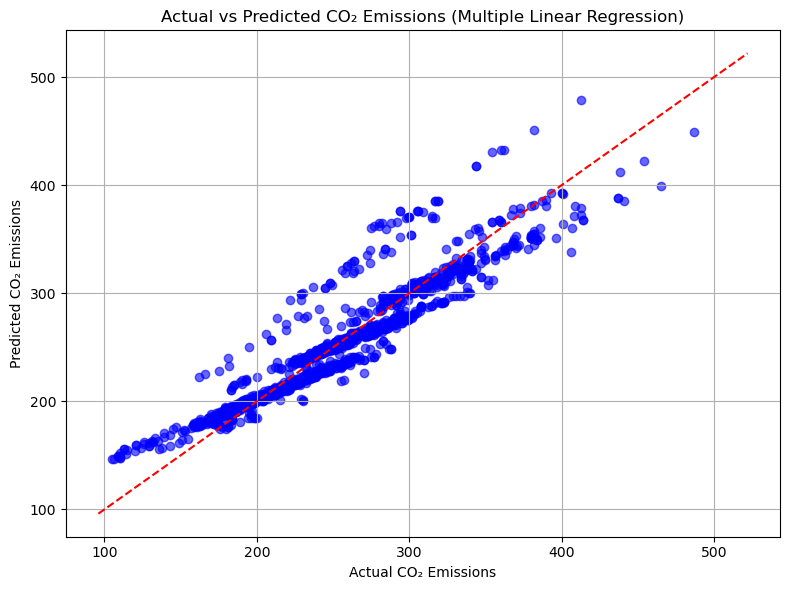

In [198]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_multi, color='blue', alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--')
plt.xlabel('Actual CO₂ Emissions')
plt.ylabel('Predicted CO₂ Emissions')
plt.title('Actual vs Predicted CO₂ Emissions (Multiple Linear Regression)')
plt.grid(True)
plt.tight_layout()
plt.show()


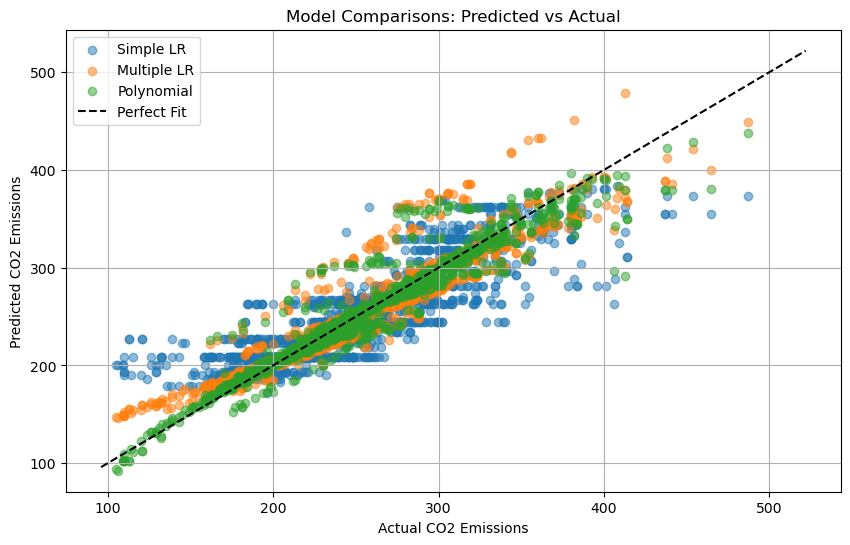

In [200]:
# Compare All Models
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_simple, alpha=0.5, label='Simple LR')
plt.scatter(y_test, y_pred_multi, alpha=0.5, label='Multiple LR')
plt.scatter(y_test, y_pred_poly, alpha=0.5, label='Polynomial')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', label='Perfect Fit')
plt.xlabel('Actual CO2 Emissions')
plt.ylabel('Predicted CO2 Emissions')
plt.title('Model Comparisons: Predicted vs Actual')
plt.legend()
plt.grid(True)
plt.show()

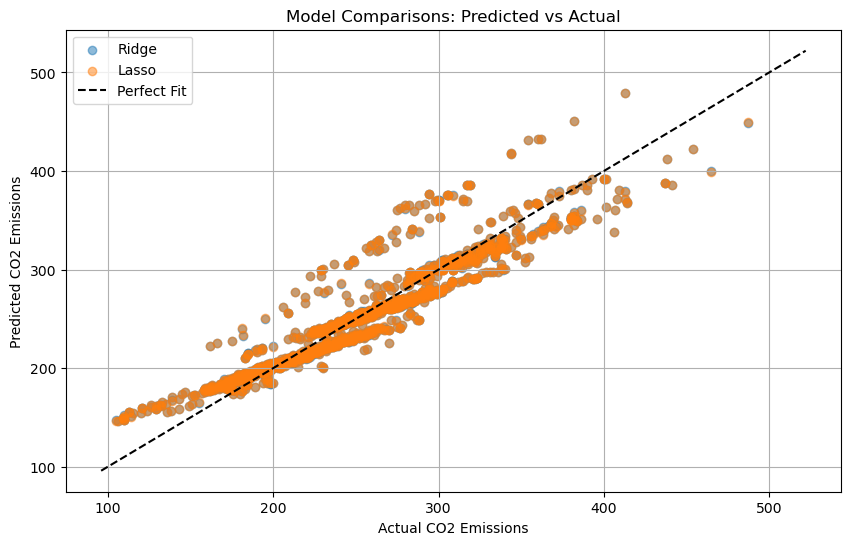

In [190]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_ridge, alpha=0.5, label='Ridge')
plt.scatter(y_test, y_pred_lasso, alpha=0.5, label='Lasso')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', label='Perfect Fit')
plt.xlabel('Actual CO2 Emissions')
plt.ylabel('Predicted CO2 Emissions')
plt.title('Model Comparisons: Predicted vs Actual')
plt.legend()
plt.grid(True)
plt.show()